In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt 
import shapefile
import shapely
import numpy as np
from tqdm.notebook import tqdm

shp = shapefile.Reader("Oberbayern/Oberbayern-hausumringe.shp") 
data = gpd.read_file("admin6munich/admin625832.shp") # these are administrative boundaries near munich on level 6 from OSM
muc=data.geometry.values[15]
inside=[]
N=0
for i in tqdm(range(len(shp))):
    p = np.array([[x,y] for x,y in shp.shape(i).points])
    c = np.mean(p, axis=0)
    if muc.contains(shapely.Point(c)):
        N=N+1
        inside += [i]

print(len(inside))

    

  0%|          | 0/2658867 [00:00<?, ?it/s]

315923


# Using it
The previous code example is not fast, but it works good enough for many cases: we extract a single geometry (Munich) and scan all polygons first computing the centroid of them, then doing a shapely containment check (converting the centroid from numpy to a Shapely point of course) and recording the matching indices. These can now be used to extract or further process images or draw some statistics out of the buildings

In [2]:
def to_polygon(x):
    P = np.array(x.points)
    return shapely.Polygon(P)

polys = [to_polygon(shp.shape(i)) for i in inside]

In [3]:
#gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon])

gdf = gpd.GeoDataFrame(index=range(len(polys)), crs=data.crs, geometry=polys)


<Axes: >

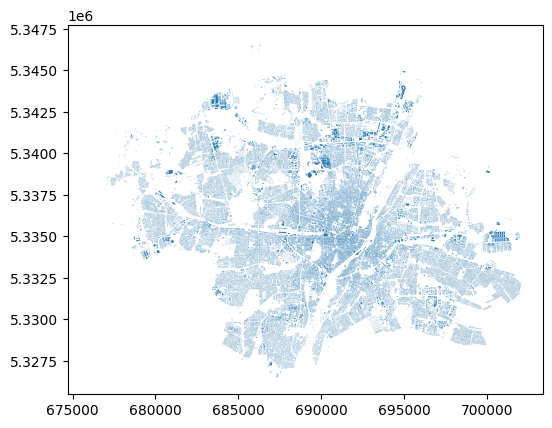

In [4]:
gdf.plot()